In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil

In [3]:
path_to_photos = '/home/user/Documents/to_server/photos'
path_to_data = '/home/user/Documents/to_server/abobus'
path_to_yolo_emo = '/home/user/Documents/to_server/yolo_emo_val'

In [4]:
emotions_dict =  {'Surprise':0,
                 'Anger':1,
                 'Sadness':2,
                 'Disquietment':3,
                 'Fear':4,
                 'Peace':5,}
# 'neutral':6}

In [5]:
os.listdir(path_to_data)

['README_EMOTIC_annotationsStructure.pdf',
 'Annotations.mat',
 'annot_arrs_val.csv',
 'annot_arrs_extra_train.csv',
 'annot_arrs_train.csv',
 'class_weights.csv',
 'annot_arrs_test.csv']

In [114]:
(arr_val['Width'][i]/224)

2.857142857142857

In [115]:
(arr_val['Width'][i] - arr_val['X_min'][i])

594.0

In [112]:
arr_val = pd.read_csv(f'{path_to_data}/annot_arrs_val.csv')
# arr_val = pd.read_csv(f'{path_to_data}/annot_arrs_train.csv')
arr_val['norm_Y2'] = [0 for i in range(len(arr_val))]
arr_val['norm_X2'] = [0 for i in range(len(arr_val))]
arr_val['norm_Y1'] = [0 for i in range(len(arr_val))]
arr_val['norm_X1'] = [0 for i in range(len(arr_val))]
for i in range(len(arr_val)):
    if arr_val['Height'][i] - arr_val['X_max'][i] >= 0:
        arr_val['norm_Y2'][i]  = (arr_val['Width'][i]  - arr_val['Y_max'][i])/(arr_val['Width'][i]/224)
        arr_val['norm_X2'][i]  = (arr_val['Height'][i] - arr_val['X_max'][i])/(arr_val['Height'][i]/224)
        arr_val['norm_Y1'][i]  = (arr_val['Width'][i] - arr_val['Y_min'][i])/(arr_val['Width'][i]/224)
        arr_val['norm_X1'][i]  = (arr_val['Height'][i] - arr_val['X_min'][i])/(arr_val['Height'][i]/224)
    else:
        arr_val['norm_Y2'][i]  = (arr_val['Height'][i]  - arr_val['Y_max'][i])/(arr_val['Height'][i]/224)
        arr_val['norm_X2'][i]  = (arr_val['Width'][i] - arr_val['X_max'][i])/(arr_val['Width'][i]/224)
        arr_val['norm_Y1'][i]  = (arr_val['Height'][i] - arr_val['Y_min'][i])/(arr_val['Height'][i]/224)
        arr_val['norm_X1'][i]  = (arr_val['Width'][i] - arr_val['X_min'][i])/(arr_val['Width'][i]/224)
arr_val.head(20)

/tmp/ipykernel_54843/2194889387.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr_val['norm_Y2'][i]  = (arr_val['Width'][i]  - arr_val['Y_max'][i])/(arr_val['Width'][i]/224)
/tmp/ipykernel_54843/2194889387.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr_val['norm_X2'][i]  = (arr_val['Height'][i] - arr_val['X_max'][i])/(arr_val['Height'][i]/224)
/tmp/ipykernel_54843/2194889387.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,Filename,Width,Height,Age,Gender,Valence,Arousal,Dominance,Peace,Affection,...,X_min,Y_min,X_max,Y_max,Arr_name,Crop_name,norm_Y2,norm_X2,norm_Y1,norm_X1
0,h616x5yhky60how3nt.jpg,317.0,380.0,Adult,Female,3.40,6.00,5.80,0.0,0.0,...,146.0,76.0,379.0,317.0,img_arr_17077.npy,crop_arr_val_0.npy,0.000000,0.589474,170.296530,137.936842
1,h616x5yhky60how3nt.jpg,317.0,380.0,Adult,Male,4.00,5.00,4.40,0.0,0.0,...,37.0,35.0,192.0,317.0,img_arr_17077.npy,crop_arr_val_1.npy,0.000000,110.821053,199.268139,202.189474
2,COCO_val2014_000000020459.jpg,640.0,458.0,Adult,Male,4.40,8.40,5.00,0.0,0.0,...,109.0,108.0,401.0,450.0,img_arr_17078.npy,crop_arr_val_2.npy,66.500000,27.877729,186.200000,170.689956
3,COCO_val2014_000000033835.jpg,640.0,480.0,Adult,Male,6.20,4.20,7.40,0.0,1.0,...,404.0,222.0,563.0,473.0,img_arr_17079.npy,crop_arr_val_3.npy,3.266667,26.950000,120.400000,82.600000
4,arhnymaeequumexga8.jpg,267.0,400.0,Adult,Male,4.80,6.00,6.20,1.0,0.0,...,2.0,2.0,370.0,266.0,img_arr_17080.npy,crop_arr_val_4.npy,0.838951,16.800000,222.322097,222.880000
5,COCO_train2014_000000535817.jpg,640.0,480.0,Adult,Male,5.60,5.40,6.40,0.0,0.0,...,149.0,89.0,425.0,351.0,img_arr_17081.npy,crop_arr_val_5.npy,101.150000,25.666667,192.850000,154.466667
6,ejobu0tpihrjoe859u.jpg,657.0,964.0,Adult,Female,3.25,5.25,6.75,0.0,0.0,...,694.0,0.0,963.0,656.0,img_arr_17082.npy,crop_arr_val_6.npy,0.340944,0.232365,224.000000,62.738589
7,ejobu0tpihrjoe859u.jpg,657.0,964.0,Adult,Female,1.60,5.40,3.60,0.0,0.0,...,395.0,38.0,780.0,653.0,img_arr_17082.npy,crop_arr_val_7.npy,1.363775,42.755187,211.044140,132.215768
8,COCO_val2014_000000187857.jpg,640.0,428.0,Adult,Male,5.60,6.60,6.40,0.0,0.0,...,291.0,32.0,489.0,349.0,img_arr_17083.npy,crop_arr_val_8.npy,41.345794,52.850000,207.252336,122.150000
9,COCO_val2014_000000244931.jpg,640.0,427.0,Adult,Female,7.50,8.25,5.25,0.0,0.0,...,230.0,4.0,533.0,370.0,img_arr_17084.npy,crop_arr_val_9.npy,29.901639,37.450000,221.901639,143.500000


In [105]:
arr_val['norm_Y2'][0]

0.0

In [101]:
arr_val[arr_val['norm_X2']>0]

,Filename,Width,Height,Age,Gender,Valence,Arousal,Dominance,Peace,Affection,...,X_min,Y_min,X_max,Y_max,Arr_name,Crop_name,norm_Y2,norm_X2,norm_Y1,norm_X1
0,COCO_val2014_000000562243.jpg,640.0,640.0,Adult,Male,5.0,3.0,9.0,0.0,0.0,...,86.0,58.0,564.0,628.0,img_arr_0.npy,crop_arr_train_0.npy,12.0,76.0,582.0,554.0
2,COCO_val2014_000000558171.jpg,640.0,480.0,Teenager,Male,7.0,8.0,8.0,0.0,0.0,...,305.0,92.0,461.0,465.0,img_arr_2.npy,crop_arr_train_2.npy,175.0,19.0,548.0,175.0
3,COCO_train2014_000000369575.jpg,480.0,640.0,Kid,Male,8.0,9.0,8.0,0.0,0.0,...,221.0,63.0,448.0,372.0,img_arr_3.npy,crop_arr_train_3.npy,108.0,192.0,417.0,419.0
4,COCO_train2014_000000213009.jpg,500.0,333.0,Adult,Male,7.0,9.0,10.0,0.0,0.0,...,44.0,143.0,150.0,288.0,img_arr_4.npy,crop_arr_train_4.npy,212.0,183.0,357.0,289.0
5,COCO_train2014_000000462955.jpg,640.0,478.0,Adult,Male,3.0,6.0,8.0,1.0,0.0,...,42.0,32.0,413.0,472.0,img_arr_5.npy,crop_arr_train_5.npy,168.0,65.0,608.0,436.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24629,frame_kgoco5y9a4nf4659.jpg,1000.0,410.0,Adult,Male,6.0,3.4,5.2,1.0,0.0,...,128.0,177.0,234.0,337.0,img_arr_14900.npy,crop_arr_train_24629.npy,663.0,176.0,823.0,282.0
24633,frame_bt7orxy7vlfhc9vp.jpg,450.0,357.0,Adult,Male,5.0,4.4,7.2,0.0,0.0,...,50.0,26.0,182.0,338.0,img_arr_1810.npy,crop_arr_train_24633.npy,112.0,175.0,424.0,307.0
24634,frame_6rg3c7wcbyqirev5.jpg,600.0,360.0,Adult,Male,5.8,5.8,6.4,1.0,0.0,...,163.0,54.0,271.0,356.0,img_arr_3301.npy,crop_arr_train_24634.npy,244.0,89.0,546.0,197.0
24635,frame_bj5qbd9zjux0ta4k.jpg,852.0,480.0,Adult,Female,6.2,4.8,6.4,1.0,0.0,...,353.0,93.0,470.0,427.0,img_arr_9178.npy,crop_arr_train_24635.npy,425.0,10.0,759.0,127.0


In [7]:
arr_val.columns

Index(['Filename', 'Width', 'Height', 'Age', 'Gender', 'Valence', 'Arousal',
       'Dominance', 'Peace', 'Affection', 'Esteem', 'Anticipation',
       'Engagement', 'Confidence', 'Happiness', 'Pleasure', 'Excitement',
       'Surprise', 'Sympathy', 'Doubt/Confusion', 'Disconnection', 'Fatigue',
       'Embarrassment', 'Yearning', 'Disapproval', 'Aversion', 'Annoyance',
       'Anger', 'Sensitivity', 'Sadness', 'Disquietment', 'Fear', 'Pain',
       'Suffering', 'X_min', 'Y_min', 'X_max', 'Y_max', 'Arr_name',
       'Crop_name'],
      dtype='object')

In [8]:
biggest_emotion = arr_val.iloc[:][emotions_dict.keys()].idxmax(axis=1)

In [9]:
arr_val['Crop_name'][0].replace('npy', 'png')

'crop_arr_val_0.png'

In [10]:
def find_emotion(idx):
    return emotions_dict[biggest_emotion[idx]]\
        if not len(set(arr_val.iloc[0][emotions_dict.keys()])) else len(emotions_dict.keys())

def bigger_than_one(val):
    if val > 1:
        return 1
    else:
        return val

def create_file(data, path, mode='w'):
    with open(f'{path}', mode) as f:
        f.write(f'{data}\n')

def bbox_to_yolo(data, n_class=0, w=1280, h=720):
        # TODO add width, height
        """
        translate bbox coordinates to yolo format
        """
        # x1, y1 = data['x1'], data['y1']
        # x2, y2 = data['x2'], data['y2']
        x1, y1 = data[0], data[1]
        x2, y2 = data[2], data[3]

        yolo_x = bigger_than_one((int(abs(x1 + x2)) / 2) / w)
        yolo_y = bigger_than_one((int(abs(y1 + y2)) / 2) / h)
        yolo_w = bigger_than_one(int(abs(x1 - x2)) / w)
        yolo_h = bigger_than_one(int(abs(y1 - y2)) / h)

        return [n_class, yolo_x, yolo_y, yolo_w, yolo_h]

In [11]:
idx = 0

for idx in range(100):#len(arr_val)):
    shutil.copy(f"{path_to_photos}/{arr_val['Crop_name'][idx].replace('npy', 'png')}",
                f"{path_to_yolo_emo}")
    create_file(data=" ".join([str(x) for x in bbox_to_yolo([arr_val.iloc[idx]['X_min'], arr_val.iloc[idx]['Y_min'],
                      arr_val.iloc[idx]['X_max'], arr_val.iloc[idx]['Y_max']],
                     n_class=find_emotion(idx),
                     w=arr_val.iloc[idx]['Width'], h=arr_val.iloc[idx]['Height'])]),
                path=f"{path_to_yolo_emo}/{arr_val['Crop_name'][idx].replace('npy', 'txt')}")


In [13]:
arr_val.iloc[72].array

<PandasArray>
['COCO_train2014_000000439576.jpg',                             640.0,
                             425.0,                        'Teenager',
                          'Female',                               5.6,
                               6.6,                               4.6,
                               0.0,                               0.0,
                               0.0,                               1.0,
                               1.0,                               1.0,
                               1.0,                               0.0,
                               0.0,                               0.0,
                               1.0,                               1.0,
                               1.0,                               0.0,
                               0.0,                               0.0,
                               0.0,                               1.0,
                               1.0,                            

In [14]:
import cv2

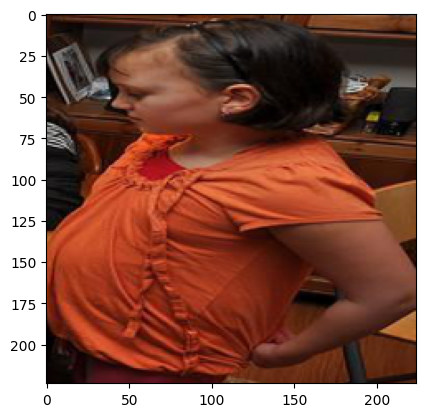

In [15]:
plt.imshow(plt.imread(f'{path_to_photos}/crop_arr_val_72.png'))

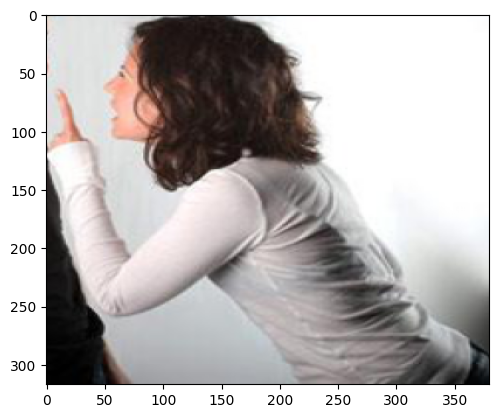

In [93]:
plt.imshow(cv2.resize(plt.imread(f'{path_to_photos}/crop_arr_val_0.png'), (int(arr_val.iloc[0]['Height']),int(arr_val.iloc[0]['Width'])), interpolation = cv2.INTER_AREA)
    )

In [91]:
arr_val.iloc[0].array

<PandasArray>
['h616x5yhky60how3nt.jpg',                    317.0,                    380.0,
                  'Adult',                 'Female',                      3.4,
                      6.0,                      5.8,                      0.0,
                      0.0,                      0.0,                      0.0,
                      1.0,                      0.0,                      0.0,
                      0.0,                      0.0,                      0.0,
                      0.0,                      1.0,                      0.0,
                      0.0,                      0.0,                      0.0,
                      1.0,                      1.0,                      1.0,
                      1.0,                      0.0,                      0.0,
                      1.0,                      0.0,                      0.0,
                      0.0,                    146.0,                     76.0,
                    379.0,            

In [ ]:
arr_val['norm_Y2'] = arr_val['Height']-arr_val['Y_max']
arr_val['norm_X2'] = arr_val['Width']-arr_val['X_max']
arr_val['norm_Y1'] = arr_val['Height']-arr_val['Y_min']
arr_val['norm_X1'] = arr_val['Width']-arr_val['X_min']

In [89]:
[640-406,425-48, 640-584, 425-414]

[234, 377, 56, 11]

In [ ]:
11, 56, 377, 234

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


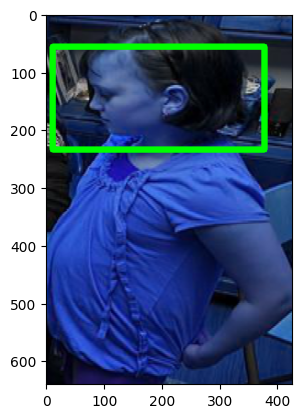

In [56]:
img = plt.imread(f'{path_to_photos}/crop_arr_val_72.png')
img = cv2.resize(img, (int(arr_val.iloc[idx]['Height']),int(arr_val.iloc[idx]['Width'])), interpolation = cv2.INTER_AREA)
cv2.rectangle(img, (int(arr_val.iloc[idx]['Height'])- int(arr_val.iloc[idx]['Y_max']), int(arr_val.iloc[idx]['Width'])-int(arr_val.iloc[idx]['X_max'])),
              (int(arr_val.iloc[idx]['Height'])-int(arr_val.iloc[idx]['Y_min']), int(arr_val.iloc[idx]['Width'])-int(arr_val.iloc[idx]['X_min'])), (0, 255, 0), 10)
# cv2.rectangle(img, (int(406/(640/224)), int(48/(425/224))), (int(584/(640/224)), int(414/(425/224))), (0, 255, 0), 10)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.show()

In [74]:
[int((int(arr_val.iloc[idx]['Height'])- int(arr_val.iloc[idx]['Y_max']))/(arr_val.iloc[idx]['Height']/224)),
int((int(arr_val.iloc[idx]['Width'])-int(arr_val.iloc[idx]['X_max']))/(arr_val.iloc[idx]['Width']/224)),
int((int(arr_val.iloc[idx]['Height'])-int(arr_val.iloc[idx]['Y_min']))/(arr_val.iloc[idx]['Height']/224)),
int((int(arr_val.iloc[idx]['Width'])-int(arr_val.iloc[idx]['X_min']))/(arr_val.iloc[idx]['Width']/224)),
 ]

[5, 19, 198, 81]

In [59]:
(int(arr_val.iloc[idx]['Height'])-int(arr_val.iloc[idx]['Y_min']), int(arr_val.iloc[idx]['Width'])-int(arr_val.iloc[idx]['X_min']))

(377, 234)

In [60]:
(arr_val.iloc[72]['Width']/224), (arr_val.iloc[idx]['Height']/224)

(2.857142857142857, 1.8973214285714286)

In [30]:
idx = 72
bbox_to_yolo([arr_val.iloc[idx]['X_min'], arr_val.iloc[idx]['Y_min'],
                      arr_val.iloc[idx]['X_max'], arr_val.iloc[idx]['Y_max']],
                     n_class=find_emotion(idx),
                     w=arr_val.iloc[idx]['Width'], h=arr_val.iloc[idx]['Height'])


[6, 0.7734375, 0.5435294117647059, 0.278125, 0.8611764705882353]

In [31]:
[arr_val.iloc[idx]['X_min'], arr_val.iloc[idx]['Y_min'],
                      arr_val.iloc[idx]['X_max'], arr_val.iloc[idx]['Y_max']]

[406.0, 48.0, 584.0, 414.0]

In [32]:
[arr_val.iloc[idx]['X_min']/arr_val.iloc[72]['Width']/224, arr_val.iloc[idx]['Y_min']/arr_val.iloc[72]['Height']/224,
              arr_val.iloc[idx]['X_max']/arr_val.iloc[72]['Width']/224, arr_val.iloc[idx]['Y_max']/arr_val.iloc[72]['Height']/224]

[0.00283203125,
 0.0005042016806722689,
 0.0040736607142857146,
 0.004348739495798319]

In [36]:
arr_val.iloc[72]['Width']/224

142.1

In [37]:
bbox_to_yolo([arr_val.iloc[idx]['X_min']/(arr_val.iloc[72]['Width']/224), arr_val.iloc[idx]['Y_min']/(arr_val.iloc[72]['Height']/224),
              arr_val.iloc[idx]['X_max']/(arr_val.iloc[72]['Width']/224), arr_val.iloc[idx]['Y_max']/(arr_val.iloc[72]['Height']/224)],
             n_class=find_emotion(idx),
             w=arr_val.iloc[idx]['Width'], h=arr_val.iloc[idx]['Height'])

[6, 0.2703125, 0.2858823529411765, 0.096875, 0.45176470588235296]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


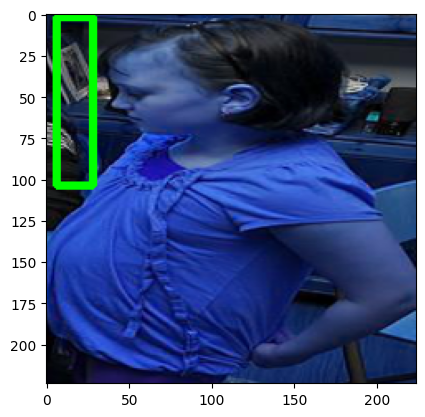

In [84]:

dw, dh = 224, 224
img = plt.imread(f'{path_to_photos}/crop_arr_val_72.png')


_, x, y, w, h = bbox_to_yolo([int((int(arr_val.iloc[idx]['Width'])-int(arr_val.iloc[idx]['X_max']))/(arr_val.iloc[idx]['Width']/224)),
 int((int(arr_val.iloc[idx]['Height'])- int(arr_val.iloc[idx]['Y_max']))/(arr_val.iloc[idx]['Height']/224)),
 int((int(arr_val.iloc[idx]['Width'])-int(arr_val.iloc[idx]['X_min']))/(arr_val.iloc[idx]['Width']/224)),
int((int(arr_val.iloc[idx]['Height'])-int(arr_val.iloc[idx]['Y_min']))/(arr_val.iloc[idx]['Height']/224)),
 ],
             n_class=find_emotion(idx),
             w=arr_val.iloc[idx]['Width'], h=arr_val.iloc[idx]['Height'])
l = int((x - w / 2) * dw)
r = int((x + w / 2) * dw)
t = int((y - h / 2) * dh)
b = int((y + h / 2) * dh)

if l < 0:
    l = 0
if r > dw - 1:
    r = dw - 1
if t < 0:
    t = 0
if b > dh - 1:
    b = dh - 1
cv2.rectangle(img, (l, t), (r, b), (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.show()

In [81]:
[int((int(arr_val.iloc[idx]['Width'])-int(arr_val.iloc[idx]['X_max']))/(arr_val.iloc[idx]['Width']/224)),
 int((int(arr_val.iloc[idx]['Height'])- int(arr_val.iloc[idx]['Y_max']))/(arr_val.iloc[idx]['Height']/224)),
 int((int(arr_val.iloc[idx]['Width'])-int(arr_val.iloc[idx]['X_min']))/(arr_val.iloc[idx]['Width']/224)),
int((int(arr_val.iloc[idx]['Height'])-int(arr_val.iloc[idx]['Y_min']))/(arr_val.iloc[idx]['Height']/224)),
 ]

[19, 5, 81, 198]

In [87]:
bbox_to_yolo([int((int(arr_val.iloc[idx]['Width'])-int(arr_val.iloc[idx]['X_max']))/(arr_val.iloc[idx]['Width']/224)),
 int((int(arr_val.iloc[idx]['Height'])- int(arr_val.iloc[idx]['Y_max']))/(arr_val.iloc[idx]['Height']/224)),
 int((int(arr_val.iloc[idx]['Width'])-int(arr_val.iloc[idx]['X_min']))/(arr_val.iloc[idx]['Width']/224)),
int((int(arr_val.iloc[idx]['Height'])-int(arr_val.iloc[idx]['Y_min']))/(arr_val.iloc[idx]['Height']/224)),
 ],
             n_class=find_emotion(idx),
             w=arr_val.iloc[idx]['Width'], h=arr_val.iloc[idx]['Height'])

KeyboardInterrupt: 